In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir('/content/drive/MyDrive/RecSys_Course_AT_PoliMi')

In [4]:
import pandas as pd

# load training dataset
data_train = pd.read_csv('data_train.csv')

# load target users to create the recommendation list for
data_target_users_test = pd.read_csv('data_target_users_test.csv')

# load "icm"
data_ICM_metadata = pd.read_csv('data_ICM_metadata.csv')

### ANALISI DEI DATI

In [ ]:
data_train

,user_id,item_id,data
0,0,0,1.0
1,0,2,1.0
2,0,120,1.0
3,0,128,1.0
4,0,211,1.0
...,...,...,...
1764602,35735,37802,1.0
1764603,35735,37803,1.0
1764604,35735,37805,1.0
1764605,35735,38000,1.0


In [ ]:
data_target_users_test

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
34226,35729
34227,35730
34228,35731
34229,35734


In [ ]:
data_ICM_metadata

,item_id,feature_id,data
0,2519,0,1.0
1,2642,0,1.0
2,3316,0,1.0
3,3400,0,1.0
4,3472,0,1.0
...,...,...,...
2940035,38107,94326,1.0
2940036,38107,94327,1.0
2940037,38107,94328,1.0
2940038,38112,94329,1.0


####analisi URM

In [6]:
#URM creation
import scipy.sparse as sp


user_list = data_train['user_id'].values
item_list = data_train['item_id'].values
data_list = data_train['data'].values

# Created as COO sparse matrix
URM_all = sp.coo_matrix((data_list, (user_list, item_list)))
print(URM_all.shape)

(35736, 38121)


In [7]:
num_users, num_items = URM_all.shape
num_interactions = URM_all.nnz
sparsity = (1 - num_interactions / (num_users * num_items)) * 100

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of interactions: {num_interactions}")
print(f"Sparsity of URM: {sparsity:.2f}%")


Number of users: 35736
Number of items: 38121
Number of interactions: 1764607
Sparsity of URM: 99.87%


Average interactions per user: 49.38
Median interactions per user: 30.0
Max interactions per user: 5895


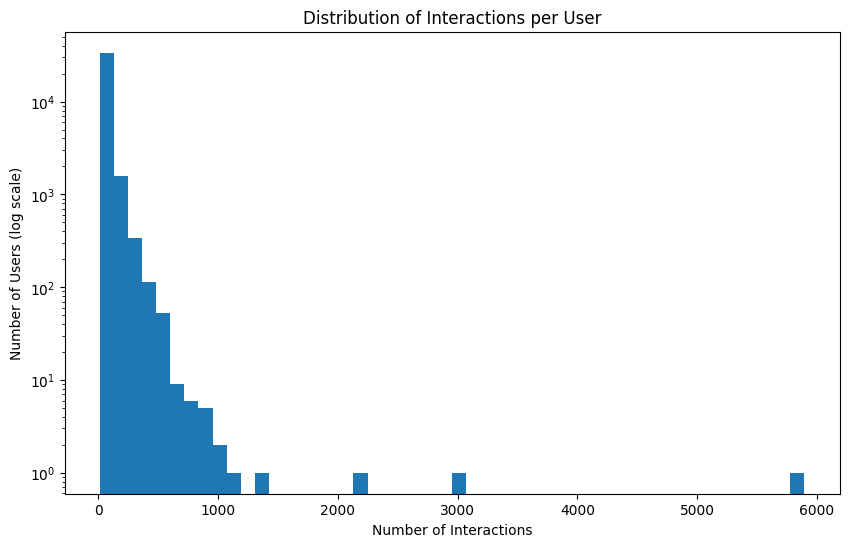

In [8]:
import numpy as np
import matplotlib.pyplot as plt

user_interaction_counts = np.ediff1d(URM_all.tocsr().indptr)

print(f"Average interactions per user: {np.mean(user_interaction_counts):.2f}")
print(f"Median interactions per user: {np.median(user_interaction_counts)}")
print(f"Max interactions per user: {np.max(user_interaction_counts)}")

plt.figure(figsize=(10, 6))
plt.hist(user_interaction_counts, bins=50, log=True)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users (log scale)')
plt.title('Distribution of Interactions per User')
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
cold_start_threshold = 15 # Define as appropriate
num_cold_start_users = np.sum(user_interaction_counts < cold_start_threshold)
percentage_cold_start_users = (num_cold_start_users / num_users) * 100

print(f"Number of cold-start users (less than {cold_start_threshold} interactions): {num_cold_start_users}")
print(f"Percentage of cold-start users: {percentage_cold_start_users:.2f}%")


Number of cold-start users (less than 15 interactions): 29
Percentage of cold-start users: 0.08%


In [11]:
n_interactions = len(data_train)
print ("The number of interactions is {}".format(n_interactions))

The number of interactions is 1764607


In [12]:
userID_unique = data_train["user_id"].unique()
itemID_unique = data_train["item_id"].unique()
n_users = len(userID_unique)
n_items = len(itemID_unique)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
print("This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively")

Number of items	 38121, Number of users	 35736
Max ID items	 38120, Max Id users	 35735

This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively


In [17]:
import numpy as np

item_popularity = np.ediff1d(URM_all.tocsc().indptr)
#item_popularity = np.sort(item_popularity)
item_popularity

array([ 48, 681, 121, ...,  39,  85,  21], dtype=int32)

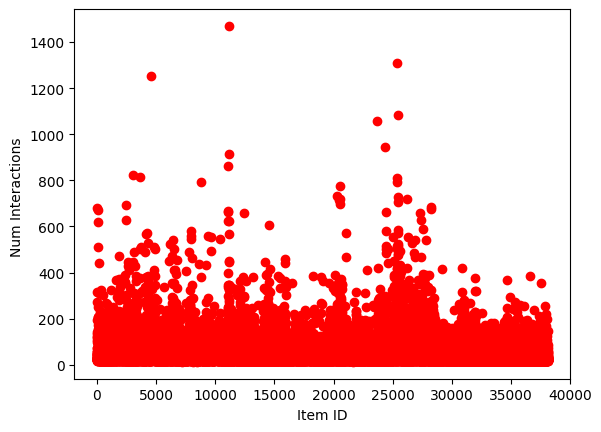

In [22]:
import matplotlib.pyplot as pyplot
pyplot.plot(item_popularity, 'ro')
pyplot.ylabel('Num Interactions ')
pyplot.xlabel('Item ID')
pyplot.show()

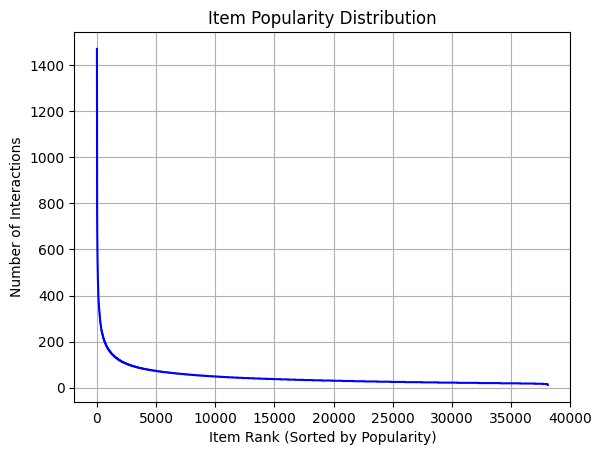

In [23]:
import matplotlib.pyplot as plt
import numpy as np

sorted_popularity = np.sort(item_popularity)[::-1]  # Sort in descending order
plt.plot(sorted_popularity, 'b-')  # Use a line plot for sorted data
plt.ylabel('Number of Interactions')
plt.xlabel('Item Rank (Sorted by Popularity)')
plt.title('Item Popularity Distribution')
plt.grid()
plt.show()


In [25]:
ten_percent = int(n_items/10)
item_popularity = np.sort(item_popularity)
print("Average per-item interactions over the whole dataset {:.2f}".
      format(item_popularity.mean()))

print("Average per-item interactions for the top 10% popular items {:.2f}".
      format(item_popularity[-ten_percent:].mean()))

print("Average per-item interactions for the least 10% popular items {:.2f}".
      format(item_popularity[:ten_percent].mean()))

print("Average per-item interactions for the median 10% popular items {:.2f}".
      format(item_popularity[int(n_items*0.45):int(n_items*0.55)].mean()))

Average per-item interactions over the whole dataset 46.29
Average per-item interactions for the top 10% popular items 153.63
Average per-item interactions for the least 10% popular items 17.95
Average per-item interactions for the median 10% popular items 31.50


In [26]:
print("Number of items with zero interactions {}".
      format(np.sum(item_popularity==0)))

Number of items with zero interactions 0


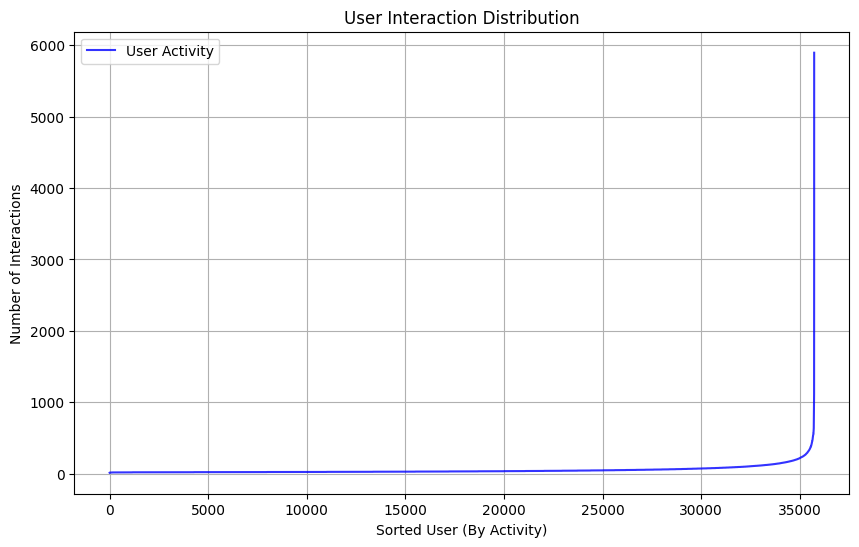

In [41]:
# Sorted User Activity Plot
user_activity = np.ediff1d(URM_all.tocsr().indptr)
sorted_user_activity = np.sort(user_activity)

plt.figure(figsize=(10, 6))
plt.plot(sorted_user_activity, label='User Activity', color='blue', alpha=0.8)
plt.ylabel('Number of Interactions')
plt.xlabel('Sorted User (By Activity)')
plt.title('User Interaction Distribution')
plt.grid()
plt.legend()
plt.show()


In [48]:
max_activity = max(user_activity)
user_activity_filtered = user_activity[user_activity != max_activity]
print(f"Original Max Activity: {max_activity}")
print(f"Filtered Max Activity: {max(user_activity_filtered)}")

#Use the filtered array to create the boolean mask instead of the original array.
max_activity = max(user_activity_filtered)
user_activity_filtered = user_activity_filtered[user_activity_filtered != max_activity] # Changed line
print(f"Original Max Activity: {max_activity}")
print(f"Filtered Max Activity: {max(user_activity_filtered)}")

max_activity = max(user_activity_filtered)
user_activity_filtered = user_activity_filtered[user_activity_filtered != max_activity] # Changed line
print(f"Original Max Activity: {max_activity}")
print(f"Filtered Max Activity: {max(user_activity_filtered)}")


Original Max Activity: 5895
Filtered Max Activity: 3040
Original Max Activity: 3040
Filtered Max Activity: 2224
Original Max Activity: 2224
Filtered Max Activity: 1383


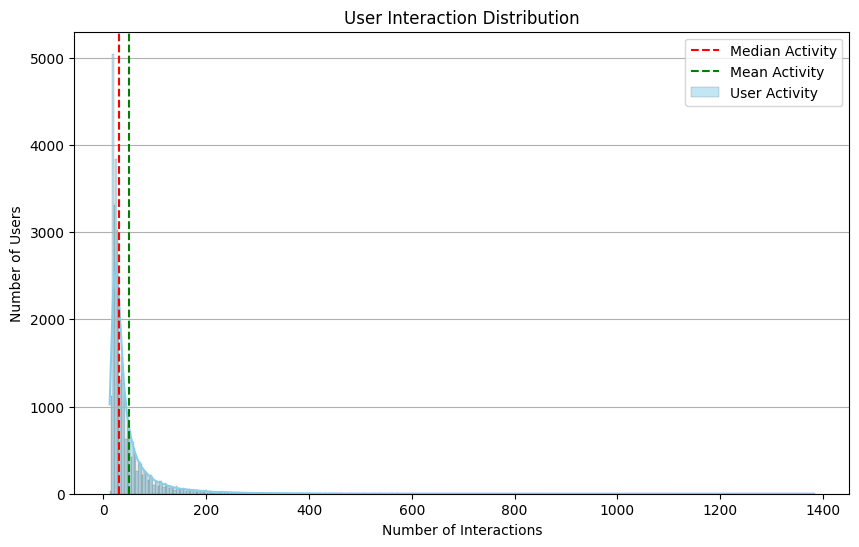

In [49]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(user_activity_filtered, bins=500, kde=True, color='skyblue', label='User Activity')
plt.axvline(np.median(user_activity_filtered), color='red', linestyle='--', label='Median Activity')
plt.axvline(np.mean(user_activity_filtered), color='green', linestyle='--', label='Mean Activity')
plt.title('User Interaction Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(axis='y')
plt.show()


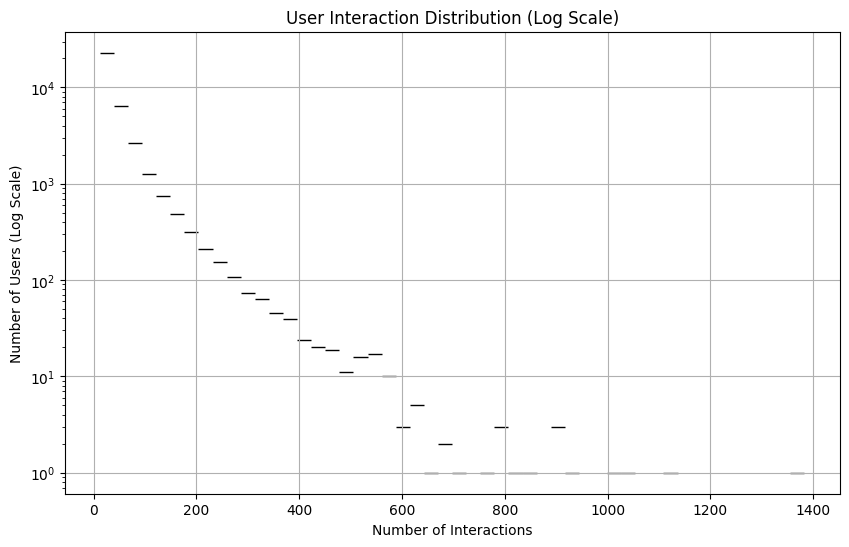

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(user_activity_filtered, bins=50, kde=False, color='skyblue', log_scale=(False, True))
plt.title('User Interaction Distribution (Log Scale)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users (Log Scale)')
plt.grid()
plt.show()


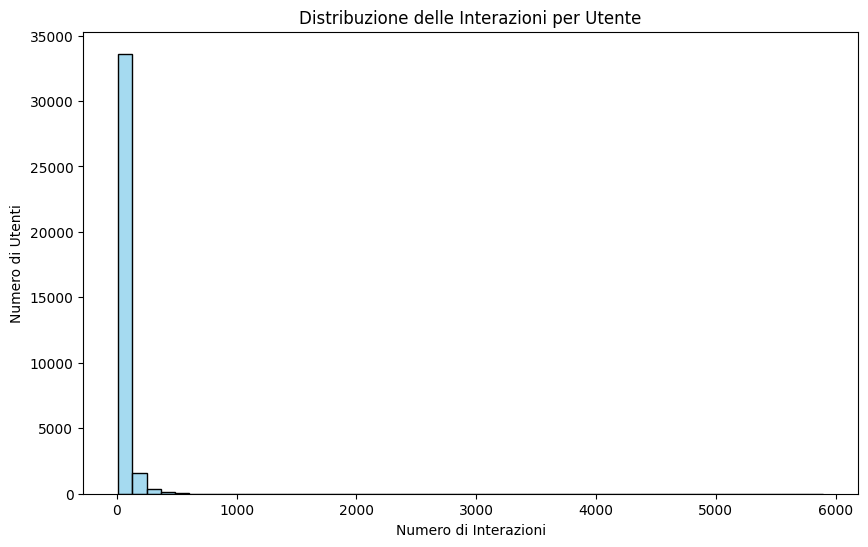

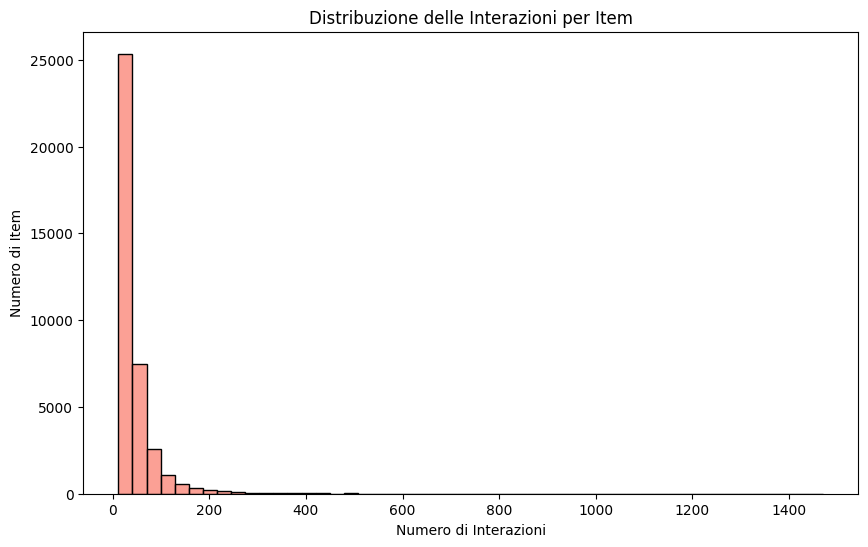

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuzione delle interazioni per utente
user_activity = np.ediff1d(URM_all.tocsr().indptr)
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50, kde=False, color='skyblue')
plt.title('Distribuzione delle Interazioni per Utente')
plt.xlabel('Numero di Interazioni')
plt.ylabel('Numero di Utenti')
plt.show()

# Distribuzione delle interazioni per item
item_popularity = np.ediff1d(URM_all.tocsc().indptr)
plt.figure(figsize=(10, 6))
sns.histplot(item_popularity, bins=50, kde=False, color='salmon')
plt.title('Distribuzione delle Interazioni per Item')
plt.xlabel('Numero di Interazioni')
plt.ylabel('Numero di Item')
plt.show()


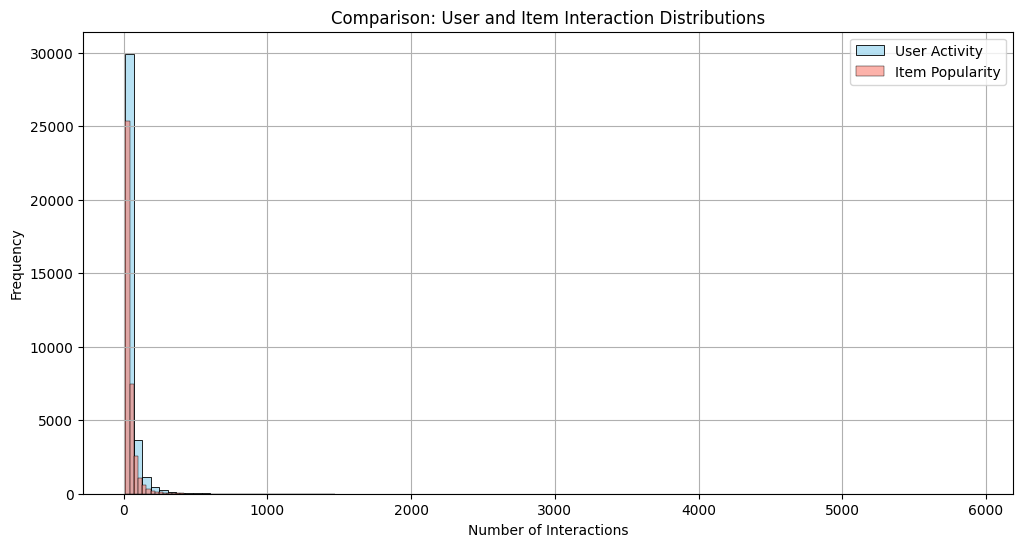

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(user_activity, bins=100, kde=False, color='skyblue', label='User Activity', alpha=0.6)
sns.histplot(item_popularity, bins=50, kde=False, color='salmon', label='Item Popularity', alpha=0.6)
plt.title('Comparison: User and Item Interaction Distributions')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


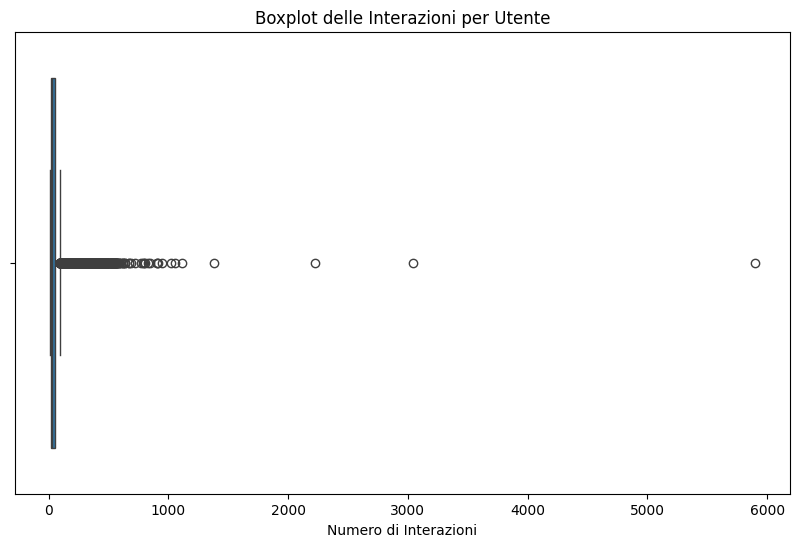

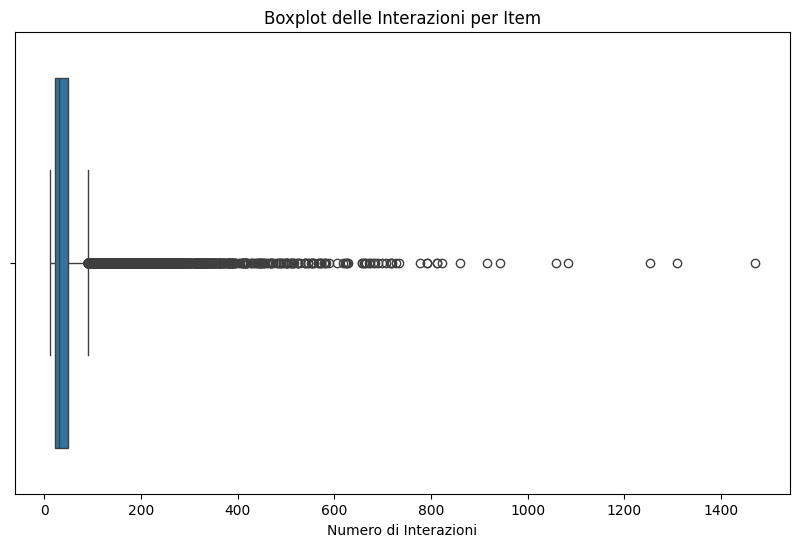

In [54]:
#per identificare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_activity)
plt.title('Boxplot delle Interazioni per Utente')
plt.xlabel('Numero di Interazioni')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=item_popularity)
plt.title('Boxplot delle Interazioni per Item')
plt.xlabel('Numero di Interazioni')
plt.show()


In [55]:
n_interactions = len(data_train)
print ("The number of interactions is {}".format(n_interactions))

The number of interactions is 1764607


In [56]:
userID_unique = data_train["user_id"].unique()
itemID_unique = data_train["item_id"].unique()
n_users = len(userID_unique)
n_items = len(itemID_unique)

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
print("This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively")

Number of items	 38121, Number of users	 35736
Max ID items	 38120, Max Id users	 35735

This confirms that the IDs are zero-indexed and continuous, covering every integer from 0 to 38,120, and from 0 to 35735, respectively


In [57]:
# Densità della matrice (percentuale di celle non nulle)
density = n_interactions / (n_users * n_items)
print(f"Densità della matrice: {density:.4%}")

Densità della matrice: 0.1295%


In [58]:

print ("Average interactions per user {:.2f}".format(n_interactions/n_users))
print ("Average interactions per item {:.2f}\n".format(n_interactions/n_items))

print ("Sparsity (so how many zeroes are there) {:.2f} %".format((1-float(n_interactions)/(n_items*n_users))*100))

Average interactions per user 49.38
Average interactions per item 46.29

Sparsity (so how many zeroes are there) 99.87 %


####Analisi ICM

In [59]:
print(data_ICM_metadata['feature_id'].unique())
# Visualizza le prime 5 righe
print(data_ICM_metadata.head())
# Verifica i valori unici nella colonna 'data'
print(data_ICM_metadata['data'].unique())

# Conta il numero di feature per ciascun item
features_per_item = data_ICM_metadata.groupby('item_id').size()

# Statistiche descrittive
print(features_per_item.describe())

[    0     1     2 ... 94328 94329 94330]
   item_id  feature_id  data
0     2519           0   1.0
1     2642           0   1.0
2     3316           0   1.0
3     3400           0   1.0
4     3472           0   1.0
[1.]
count    38121.000000
mean        77.123895
std         74.742438
min          1.000000
25%         17.000000
50%         66.000000
75%        113.000000
max       2013.000000
dtype: float64


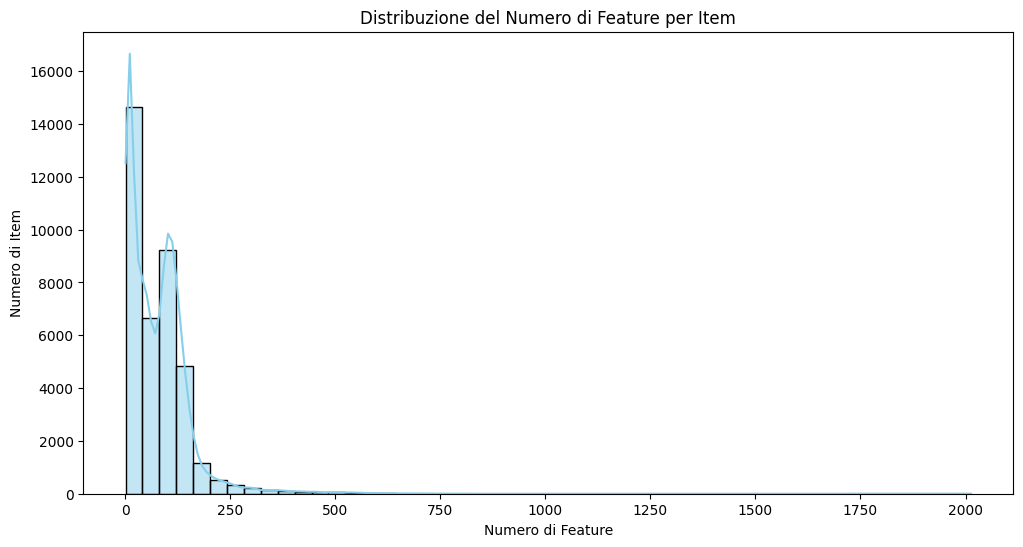

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(features_per_item, bins=50, kde=True, color='skyblue')
plt.title('Distribuzione del Numero di Feature per Item')
plt.xlabel('Numero di Feature')
plt.ylabel('Numero di Item')
plt.show()


In [61]:
# Conta il numero di item per ciascuna feature
items_per_feature = data_ICM_metadata.groupby('feature_id').size()

# Top 10 feature più comuni
top_features = items_per_feature.sort_values(ascending=False).head(10)
print("Top 10 feature più comuni:")
print(top_features)

# Top 10 feature meno comuni
bottom_features = items_per_feature.sort_values(ascending=True).head(10)
print("\n10 feature meno comuni:")
print(bottom_features)


Top 10 feature più comuni:
feature_id
2       38121
131     17750
41      12181
178     11673
420     10987
86      10947
89      10712
1175    10221
100     10187
101      9237
dtype: int64

10 feature meno comuni:
feature_id
47165    1
62127    1
62126    1
62125    1
62123    1
62122    1
62121    1
62120    1
62128    1
62119    1
dtype: int64


<ipython-input-25-5a0f7efc7d6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index.astype(str), y=top_features.values, palette='viridis')


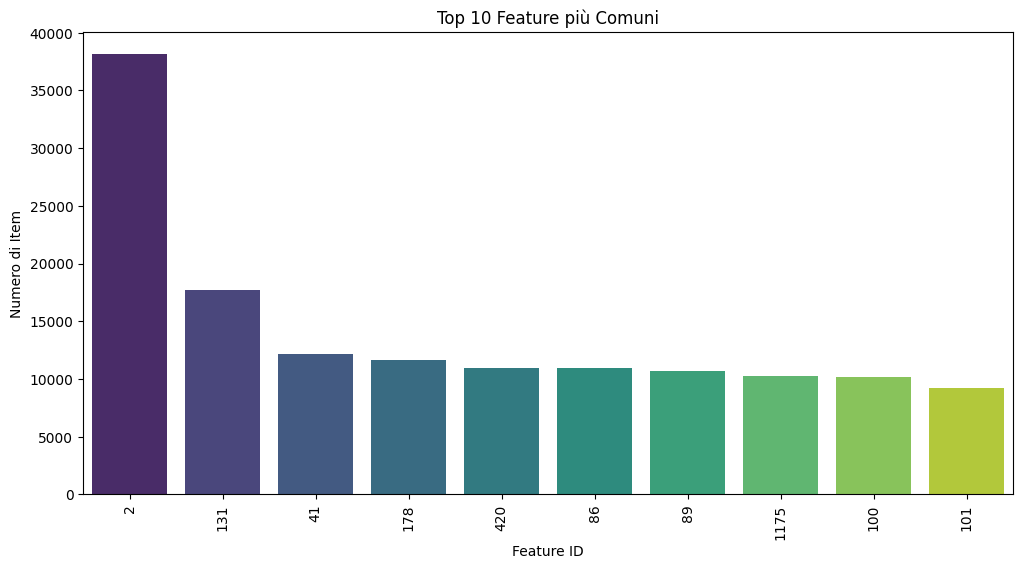

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizzazione delle feature più comuni
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features.index.astype(str), y=top_features.values, palette='viridis')
plt.title('Top 10 Feature più Comuni')
plt.xlabel('Feature ID')
plt.ylabel('Numero di Item')
plt.xticks(rotation=90)
plt.show()




In [62]:
import pandas as pd

# Filtra il DataFrame per feature_id = 2
feature_2_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 2]
feature_131_df = data_ICM_metadata[data_ICM_metadata['feature_id'] == 131]

# Verifica se 'data' è sempre 1 o se è necessario filtrare
unique_data_values = feature_2_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values}")
unique_data_values131 = feature_131_df['data'].unique()
print(f"Valori unici nella colonna 'data' per feature_id=2: {unique_data_values131}")

# Se 'data' può essere 0 o 1, filtra solo le righe con data = 1
if 1 in unique_data_values:
    feature_2_present_df = feature_2_df[feature_2_df['data'] == 1]
else:
    feature_2_present_df = feature_2_df

if 1 in unique_data_values131:
    feature_131_present_df = feature_131_df[feature_131_df['data'] == 1]
else:
    feature_131_present_df = feature_131_df

# Conta il numero di item unici con feature_id = 2
num_items_with_feature_2 = feature_2_present_df['item_id'].nunique()
num_items_with_feature_131 = feature_131_present_df['item_id'].nunique()

# Numero totale di feature unici
num_features = data_ICM_metadata['feature_id'].nunique()
print(f"Numero totale di feature: {num_features} e item: {n_items}")



print(f"Numero di item con feature_id = 2: {num_items_with_feature_2}, cioè il {(num_items_with_feature_2/n_items)*100}% degli ha il feature con id = 2! è inutile")
print(f"Numero di item con feature_id = 131: {num_items_with_feature_131}, cioè il {(num_items_with_feature_131/n_items)*100}%")


Valori unici nella colonna 'data' per feature_id=2: [1.]
Valori unici nella colonna 'data' per feature_id=2: [1.]
Numero totale di feature: 94331 e item: 38121
Numero di item con feature_id = 2: 38121, cioè il 100.0% degli ha il feature con id = 2! è inutile
Numero di item con feature_id = 131: 17750, cioè il 46.56226227013982%


####analisi target users


In [64]:
# Extract target user IDs
target_user_ids = data_target_users_test['user_id'].unique()
print(f"Number of target users: {len(target_user_ids)}")


Number of target users: 34231


In [65]:
# If user IDs are sequential and start from 0
# Otherwise, create a mapping
unique_users = np.unique(user_list)
user_id_to_index = {user_id: index for index, user_id in enumerate(unique_users)}
index_to_user_id = {index: user_id for user_id, index in user_id_to_index.items()}

# Map target user IDs to URM indices
target_user_indices = [user_id_to_index.get(user_id, -1) for user_id in target_user_ids]
target_user_indices = np.array(target_user_indices)

# Filter out users not present in URM
valid_target_user_mask = target_user_indices >= 0
target_user_indices = target_user_indices[valid_target_user_mask]
print(f"Number of valid target users in URM: {len(target_user_indices)}")


Number of valid target users in URM: 34231


In [66]:
# Compute interaction counts for all users
user_interaction_counts = np.ediff1d(URM_all.tocsr().indptr)

# Get interaction counts for target users
target_user_interaction_counts = user_interaction_counts[target_user_indices]

print(f"Average interactions per target user: {np.mean(target_user_interaction_counts):.2f}")
print(f"Median interactions per target user: {np.median(target_user_interaction_counts)}")
print(f"Max interactions per target user: {np.max(target_user_interaction_counts)}")


Average interactions per target user: 50.45
Median interactions per target user: 31.0
Max interactions per target user: 5895


In [67]:
# Define cold-start threshold (e.g., users with 0 interactions)
cold_start_threshold = 0
num_cold_start_target_users = np.sum(target_user_interaction_counts == cold_start_threshold)
percentage_cold_start_target_users = (num_cold_start_target_users / len(target_user_indices)) * 100

print(f"Number of cold-start target users: {num_cold_start_target_users}")
print(f"Percentage of cold-start target users: {percentage_cold_start_target_users:.2f}%")


Number of cold-start target users: 0
Percentage of cold-start target users: 0.00%


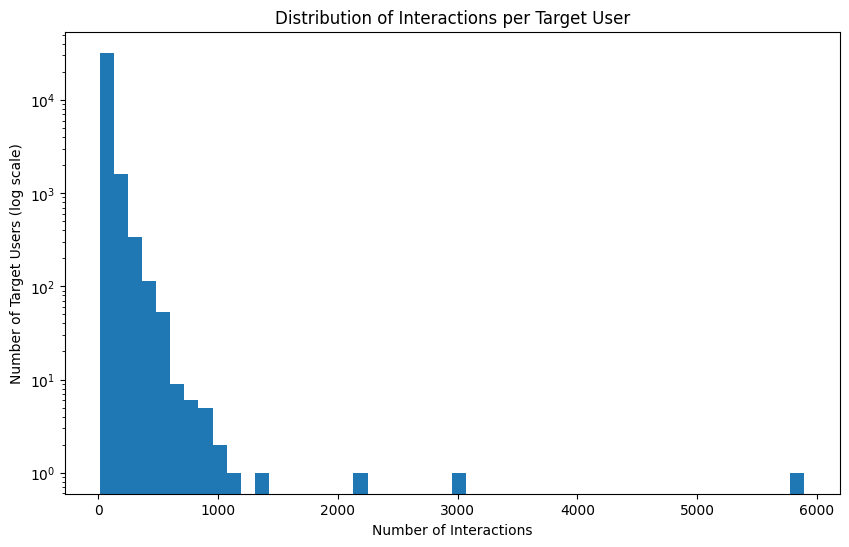

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(target_user_interaction_counts, bins=50, log=True)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Target Users (log scale)')
plt.title('Distribution of Interactions per Target User')
plt.show()


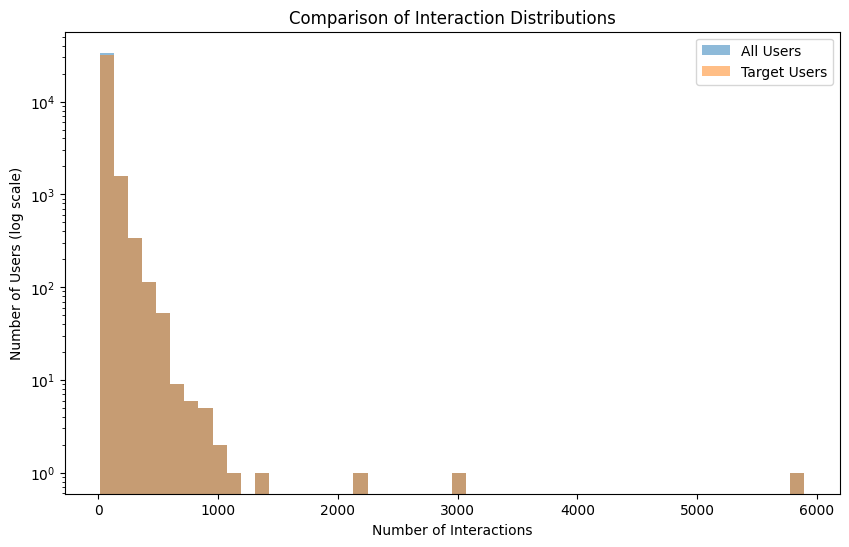


they are the same


In [71]:
# Plot overall user interaction distribution
plt.figure(figsize=(10, 6))
plt.hist(user_interaction_counts, bins=50, alpha=0.5, label='All Users', log=True)
plt.hist(target_user_interaction_counts, bins=50, alpha=0.5, label='Target Users', log=True)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users (log scale)')
plt.title('Comparison of Interaction Distributions')
plt.legend()
plt.show()
print("""
==========
they are the same
==========""")

In [72]:
# Calculate percentiles for target users
low_activity_threshold = np.percentile(target_user_interaction_counts, 33)
high_activity_threshold = np.percentile(target_user_interaction_counts, 66)

# Create masks for activity levels
low_activity_users = target_user_interaction_counts <= low_activity_threshold
medium_activity_users = (target_user_interaction_counts > low_activity_threshold) & (target_user_interaction_counts <= high_activity_threshold)
high_activity_users = target_user_interaction_counts > high_activity_threshold

# Count users in each group
num_low_activity_users = np.sum(low_activity_users)
num_medium_activity_users = np.sum(medium_activity_users)
num_high_activity_users = np.sum(high_activity_users)

print(f"Number of low activity target users: {num_low_activity_users}")
print(f"Number of medium activity target users: {num_medium_activity_users}")
print(f"Number of high activity target users: {num_high_activity_users}")


Number of low activity target users: 11333
Number of medium activity target users: 11268
Number of high activity target users: 11630


In [73]:
# Function to print stats for each group
def print_group_stats(group_name, interaction_counts):
    print(f"{group_name} Activity Target Users:")
    print(f"  Number of users: {len(interaction_counts)}")
    print(f"  Average interactions: {np.mean(interaction_counts):.2f}")
    print(f"  Median interactions: {np.median(interaction_counts)}")
    print(f"  Max interactions: {np.max(interaction_counts)}\n")

# Low activity users
print_group_stats("Low", target_user_interaction_counts[low_activity_users])

# Medium activity users
print_group_stats("Medium", target_user_interaction_counts[medium_activity_users])

# High activity users
print_group_stats("High", target_user_interaction_counts[high_activity_users])


Low Activity Target Users:
  Number of users: 11333
  Average interactions: 20.38
  Median interactions: 20.0
  Max interactions: 24

Medium Activity Target Users:
  Number of users: 11268
  Average interactions: 31.76
  Median interactions: 31.0
  Max interactions: 42

High Activity Target Users:
  Number of users: 11630
  Average interactions: 97.85
  Median interactions: 70.0
  Max interactions: 5895



In [75]:
# Users in URM
users_in_urm = set(unique_users)

# Users not in URM
missing_users = set(target_user_ids) - users_in_urm

print(f"Number of target users not in URM: {len(missing_users)}")
if len(missing_users) > 0:
    print("These users are not present in the URM and cannot be provided with recommendations based on historical data.")
print("0 means that all the users in the target list are present in the training URM")

Number of target users not in URM: 0
0 means that all the users in the target list are present in the training URM
